<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF280 - Estadística Computacional </h1>
    <h2> Análisis exploratorio de datos </h2>
    <h2> Version: 0.02 </h2>
    <h2> Ay. Nicolás Armijo Calquín </h2> 
    <h2> Ay. Eva Wang Liu </h2>
</center>

<div id='toc'>

## Tabla de Contenidos

* [Introducción](#intro)
* [Paso 1: Adquisición de datos](#adquisicion_datos)
* [Paso 2: Limpieza de datos](#limpieza_datos)
   * [Tipos de datos incorrectos](#tipos_datos_incorrectos)
   * [Datos inconsistentes](#datos_inconsistentes)
   * [Datos faltantes](#datos_faltantes)
   * [Datos duplicados](#datos_duplicados)
* [Paso 3: Estadística descriptiva](#estadistica_descriptiva)
* [Paso 4: Visualización de datos](#visualizacion_datos)
* [Modelado de datos](#modelado_datos)
    * [Scikit-learn](#scikit-learn)
      * [Linear Regression](#linear_regression)
    * [Regresión lineal](#regresion_lineal)
* [Historial de versiones](#hist)

<div id='intro'>

## Introducción

El análisis exploratorio de datos (EDA) es un primer paso crítico en el análisis de datos. Es un enfoque que explora conjuntos de datos para resumir sus principales características utilizando estadísticas descriptivas y métodos de visualización de datos. 

El EDA consiste básicamente en iterar sobre los siguientes pasos:

1. **Adquisición de datos**.
2. **Limpieza de datos**.
3. **Estadística descriptiva**.
4. **Visualización de datos**.
5. **Pruebas de hipótesis** (no se verán en los laboratorios de este curso).

Una vez completado el EDA podemos aplicar modelos formales de datos, tales como modelos de regresión lineal.

En el presente Jupyter Notebook recorreremos los pasos y las herramientas fundamentales de un EDA, consolidando todo lo aprendido en los Jupyter Notebooks anteriores: `CH0-Pandas-Numpy`, `CH1-Estadística_Descriptiva` y `CH2-Visualización_Datos`. Por último, explicaremos las herramientas básicas para la realización de un modelo de regresión lineal haciendo uso de la librería Scikit-learn.

Antes de partir, importaremos las librerías que complementarán nuestro trabajo:

In [59]:
# Importamos librerías complementarias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<div id='adquisicion_datos'>

## Paso 1: Adquisición de datos

La adquisición de datos es el primer paso de todo análisis de datos. Consiste en la recolección y almacenamiento de datos relevantes y de alta calidad que nos servirán como base para el análisis.

En nuestro caso, es común que nuestros datos vengan en un archivo `CSV`, el cual tendremos que abrir y leer.

In [45]:
# Leemos un archivo CSV
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=["sepal_length_in_cm", "sepal_width_in_cm", "petal_length_in_cm", "petal_width_in_cm", "class"])
df

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Para información más detallada acerca de cómo leer un archivo, veáse `CH0-Pandas-Numpy`.

<div id='limpieza_datos'>

## Paso 2: Limpieza de datos

La limpieza de datos consiste en mejorar la calidad de los datos a través de la corrección de errores, inconsistencias o 
problemas en el conjunto de datos a analizar.

A continuación, veremos algunos métodos de limpieza de datos sencillos que podrían ser de utilidad.

<div id='tipos_datos_incorrectos'>

### Tipos de datos incorrectos

Si tenemos tipos de datos que no son compatibles con nuestras operaciones de análisis, debemos realizar una conversión de tipos de datos.

El método `df.dtypes` nos permitirá conocer los tipos de datos en nuestro conjunto de datos.

In [49]:
# Averiguamos los tipos de datos de cada columna
df.dtypes

sepal_length_in_cm    float64
sepal_width_in_cm     float64
petal_length_in_cm    float64
petal_width_in_cm     float64
class                  object
dtype: object

El método `df.astype` nos permitirá realizar conversión de tipos de datos en una columna del DataFrame de forma sencilla, ingresando como parámetro el tipo de dato al cual se quiere convertir. No obstante, existen otros métodos y funciones dependiendo de la conversión que tengamos que hacer.

In [51]:
# Convertimos el tipo de dato de la columna "petal_length_in_cm" desde float64 a int
df["petal_length_in_cm"].astype(int)

0      1
1      1
2      1
3      1
4      1
      ..
145    5
146    5
147    5
148    5
149    5
Name: petal_length_in_cm, Length: 150, dtype: int32

<div id='datos_inconsistentes'>

### Datos inconsistentes

Algunos ejemplos de inconsistencias en los conjuntos de datos son las variaciones en nombres de etiquetas, formato de fecha, unidad de medida, entre otros. Las inconsistencias pueden causar errores en el análisis, por lo que manejarlas es fundamental; por ejemplo, se puede normalizar y estandarizar datos para que estos tengan un formato consistente.

En general, el manejo de los datos inconsistentes se puede realizar aplicando funciones y métodos sobre el DataFrame, por lo cual es recomendable revisar el `CH0-Pandas-NumPy` para más información.

<div id='datos_faltantes'>

### Datos faltantes

Los datos faltantes son celdas vacías o con valores nulos en el conjunto de datos.

El método `df.isnull` nos permitirá saber si hay un valor nulo en cada celda del DataFrame; luego, `df.isnull.sum` nos entregará la 
cantidad de valores nulos por cada columna del DataFrame.

In [42]:
# Calculamos la cantidad de valores nulos en cada columna
df.isnull().sum()

sepal_length_in_cm    0
sepal_width_in_cm     0
petal_length_in_cm    0
petal_width_in_cm     0
class                 0
dtype: int64

El manejo de los datos faltantes queda a decisión de cada persona; podemos eliminarlos, imputarlos con valores promedio o 
medianos, entre otros.

Por ejemplo, el método `df.dropna` nos permitirá eliminar filas o columnas con valores nulos en un DataFrame dependiendo de su parámetro `axis`:

* `df.dropna(axis=0)`: se eliminan **filas** con valores nulos del DataFrame.
* `df.dropna(axis=1)`: se eliminan **columnas** con valores nulos del DataFrame.

In [26]:
# Eliminamos columnas con valores nulos
df.dropna(axis=1)

<div id='datos_duplicados'>

### Datos duplicados

Los datos duplicados son filas que tienen los mismos valores en todas o algunas de sus columnas. Si estos no se supone que debieran estar repetidos, debemos manejar estos datos.

El método `df.drop_duplicates` nos permitirá eliminar filas duplicadas del DataFrame. Por defecto, su parámetro opcional `subset=None` identifica filas duplicadas considerando todas las columnas del DataFrame.

In [27]:
# Eliminamos filas duplicadas de la columna class
df.drop_duplicates(subset="class")

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
50,7.0,3.2,4.7,1.4,Iris-versicolor
100,6.3,3.3,6.0,2.5,Iris-virginica


<div id='estadistica_descriptiva'>

## [Paso 3: Estadística descriptiva](https://github.com/narmijoc/INF280-LEC/blob/main/CH1-Estad%C3%ADstica_Descriptiva.ipynb)

Este paso es visto con detalle en `CH1-Estadística_Descriptiva`.

<div id='visualizacion_datos'>

## [Paso 4: Visualización de datos](https://github.com/narmijoc/INF280-LEC/blob/main/CH2-Visualizaci%C3%B3n_Datos.ipynb)

Este paso es visto con detalle en `CH2-Visualización_Datos`.

<div id='modelado_datos'>

## Modelado de datos

El modelado de datos consiste en el proceso de usar modelos matemáticos, estadísticos y computacionales para analizar e inferir sobre un conjunto de datos. Este proceso implica elegir un modelo adecuado, ajustarlo y usarlo para realizar predicciones.

En nuestro caso, será útil aprender a realizar un modelo de regresión lineal sobre nuestro conjunto de datos haciendo uso de la librería Scikit-learn.

<div id='scikit-learn'>

### Scikit-learn

Scikit-learn (también llamado sklearn) es una librería de Python dedicada al aprendizaje automático y el análisis de datos. Proporciona herramientas eficientes y fáciles de usar para realizar tareas comunes en el campo del aprendizaje automático, como clasificación, regresión, clustering, reducción de dimensionalidad y selección de modelos.

Se adjuntan distintos recursos que les puede ser de utilidad:

* **Documentación oficial** https://scikit-learn.org/stable/user_guide.html

<div id='Linear_regression'>

### Linear Regression

Linear Regression es un clase dentro del submódulo Linear Model en la librería Scikit-learn. En esta clase se encuentran las herramientas para la realización de un modelo de regresión lineal básico y directo, las cuales corresponden a todas las funcionalidades que requeriremos.

In [54]:
# Importamos Linear Regression - Debemos instalar Sklearn con pip install scikit-learn
from sklearn.linear_model import LinearRegression

<div id='Regresion_lineal'>

### Regresión lineal

La regresión lineal es un método estadístico utilizado para modelar y analizar la relación entre una variable dependiente y una o más variables independientes. Su objetivo principal es ajustar una línea a los datos para predecir la variable dependiente en función de las variables independientes.

Para realizar un modelo de regresión lineal usando Scikit-learn, ocuparemos los siguientes métodos y funciones:

* `LinearRegression`: **crea** un módelo de regresión lineal.

* `LinearRegression.fit`: **ajusta** el modelo de regresión lineal, de acuerdo a los siguientes parámetros:

    * `X`: datos de entrenamiento.
    * `Y`: valores objetivo.
    
* `LinearRegression.predict`: **predice** usando el modelo de regresión lineal, con un parámetro `X`, que corresponde a las muestras.

A continuación, veremos un ejemplo:

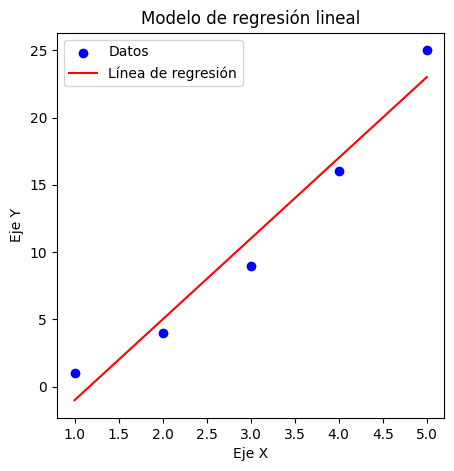

In [63]:
# Generamos los datos
x = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = [1, 4, 9, 16, 25]

# Crear modelo de regresión lineal
modelo = LinearRegression()

#Ajustar modelo de regresión lineal
modelo.fit(x, y)

# Predecir usando el modelo de regresión lineal
y_predict = modelo.predict(x)

# Graficar modelo
plt.figure(figsize = (5, 5))
plt.scatter(x, y, label = "Datos", color = "blue")
plt.plot(x, y_predict, label = "Línea de regresión", color = "red")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Modelo de regresión lineal")
plt.legend()
plt.show()

<div id='hist'>

# Historial de Versiones 

* **Versión v0.02:** Primera versión del material previo al LEC 1 2024-2. - *28 de Agosto del 2024*. 